<a href="https://colab.research.google.com/github/nieve20/tibame0619/blob/main/app_ipynb%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''

資料 mapping 至google drive

把資料寫在/content/drive

即可保存在 google drive內

'''
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install line-bot-sdk
!pip install line-bot-sdk flask flask-ngrok
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.28.2 which 

In [3]:
'''
解壓縮模型
'''

from zipfile import ZipFile

with ZipFile('converted_savedmodel.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('converted_savedmodel')

with ZipFile('shape_predictor_68_face_landmarks.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('shape_predictor_68_face_landmarks')

In [4]:
'''
載入類別列表
'''
class_dict = {}
with open('converted_savedmodel/labels.txt') as f:
    for line in f:
       (key, val) = line.split()
       class_dict[int(key)] = val

In [5]:
# 引用Web Server套件
from flask import Flask, request, abort, jsonify

# 載入json處理套件
import json

# 外部連結自動生成套件
from flask_ngrok import run_with_ngrok
from pyngrok import ngrok

# 從linebot 套件包裡引用 LineBotApi 與 WebhookHandler 類別
from linebot import (
    LineBotApi, WebhookHandler
)

# 引用無效簽章錯誤
from linebot.exceptions import (
    InvalidSignatureError
)

In [6]:
# 設定Server啟用細節
app = Flask(__name__,static_url_path = "/material" , static_folder = "./material/")
run_with_ngrok(app)

# 生成實體物件
line_bot_api = LineBotApi("gloyX3JokhzZnYhn2rAmeMfbnyweaVq/ii2rhEQ6O6UQtuOujqd2mK319ide490hhw+NgTyJY1txrxnSTaV70SVGIrzbEYM1VSO3o5n+u7FQ+9exmFh3HU9eBAW8FDzUVvExIkAlYCI7w2hHz1hb0wdB04t89/1O/w1cDnyilFU=")
handler = WebhookHandler("6d3e8b3565bcf2c9a1f43d0dd61952af")

In [7]:
# 啟動server對外接口，使Line能丟消息進來
@app.route("/", methods=['POST'])
def callback():
    # get X-Line-Signature header value
    # line加密簽章
    signature = request.headers['X-Line-Signature']

    # get request body as text
    # 用戶傳來的內容
    body = request.get_data(as_text=True)
    print(body)

    # 記錄用戶log
    # 存在gooogle drive上，ai-event.log
    f = open("/content/drive/MyDrive/ai-event.log", "a")
    f.write(body)
    f.close()

    # handle webhook body
    # 把消息交給handler做驗證
    # 會看是什麼樣的Event,做不同的處理
    try:

        handler.handle(body, signature)
    except InvalidSignatureError:
        abort(400)

    return 'OK'

In [27]:
# 引用套件
import os
import sys
import dlib
import math
import requests
import tensorflow.keras
import faceBlendCommon as fbc
from PIL import Image, ImageOps
import cv2
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from linebot.models import (
    MessageAction, URIAction, PostbackAction, DatetimePickerAction,CameraAction, CameraRollAction, LocationAction,
    MessageEvent, TextMessage, TextSendMessage,
    ImageMessage, ImageSendMessage,
    QuickReply, QuickReplyButton, RichMenu,
    ButtonsTemplate, TemplateSendMessage, CarouselTemplate, ImageCarouselTemplate,
    CarouselColumn, ImageCarouselColumn,
    PostbackEvent, PostbackTemplateAction
)

from linebot.models.events import (
    FollowEvent
)

In [28]:
# 傳送詢問用戶拍照的訊息
text_message_1 = TextSendMessage(text="唇彩新色號發售中～\n\n請選擇想試用的新色號：")
text_message_2 = TextSendMessage(text="請上傳臉部明顯的照片或拍照")
buttons_template_color = TemplateSendMessage(
            alt_text='選擇口紅色號',
            template=ImageCarouselTemplate(
                columns=[
                    ImageCarouselColumn(
                        image_url='https://i.imgur.com/GOEhDGB.jpg',
                        action=PostbackTemplateAction(
                            label='南瓜色',
                            text='PumpkinSpiceLatte',
                            data='@PumpkinSpiceLatte'
                        )
                    ),
                    ImageCarouselColumn(
                        image_url='https://i.imgur.com/WLDHwoK.jpg',
                        action=PostbackTemplateAction(
                            label='聖誕紅',
                            text='Poinsettia',
                            data='@Poinsettia'
                        )
                    ),
                    ImageCarouselColumn(
                        image_url='https://i.imgur.com/h32w7F1.jpg',
                        action=PostbackTemplateAction(
                            label='玫瑰紅',
                            text='Rose',
                            data='@Rose'
                        )
                    ),
                    ImageCarouselColumn(
                        image_url='https://i.imgur.com/gyxCwrF.jpg',
                        action=PostbackTemplateAction(
                            label='珊瑚紅',
                            text='Coral',
                            data='@Coral'
                        )
                    )
                ]
            )
        )

In [29]:
# TextMessage

should_process_image = False
makeup_image = False
skin_tone = False
selected_color = None
colors = ["PumpkinSpiceLatte", "Poinsettia", "Rose", "Coral"]

@handler.add(MessageEvent, message=TextMessage)
def handle_message(event):

    global skin_tone

    if event.message.text == '@膚色調測驗':
        skin_tone = True
        send_question_and_options(event.reply_token)

    elif skin_tone:
        if event.message.text == '@A' or event.message.text == '@B':
            handle_skin_tone(event)

    elif event.message.text == '@個人化推薦':
        line_bot_api.reply_message(
        event.reply_token,
        TextSendMessage(text="想要了解您適合什麼產品嗎？\n請打開相機或上傳自拍照。")
        )
        global should_process_image
        should_process_image = True

    elif event.message.text == '@新品上市':
        line_bot_api.reply_message(
            event.reply_token,
            buttons_template_new
        )

    elif event.message.text == '@線上客服':
        line_bot_api.reply_message(
            event.reply_token,
            TextSendMessage(text="請在此留下您的問題，我們將派專人與您聯繫。")
        )

    elif event.message.text == '@限時優惠券':
        pass

    elif event.message.text == '@虛擬化妝間':
        line_bot_api.reply_message(
            event.reply_token,
            [text_message_1, buttons_template_color])
        global makeup_image
        global selected_color
        makeup_image = True
        selected_color = event.message.text

    elif event.message.text in colors:
        line_bot_api.reply_message(
        event.reply_token,
            [text_message_2])
        selected_color = event.message.text

    else:
        line_bot_api.reply_message(
            event.reply_token,
            TextSendMessage(text="請點選下方圖文選單，獲得更多美妝資訊。")
        )

In [30]:
# ImageMessage

@handler.add(MessageEvent, message=ImageMessage)
def handle_image_message(event):
    global should_process_image
    global makeup_image
    global selected_color

    if should_process_image:
        handle_process_image(event)

    elif makeup_image:
        handle_makeup_image(event)

In [31]:
# PostbackEvent

@handler.add(PostbackEvent)
def handle_postback(event):
    global skin_tone

    if skin_tone:
        handle_skin_tone(event)

In [32]:
#圖文選單

menuRawData="""
{
  "size": {
    "width": 2500,
    "height": 1686
  },
  "selected": true,
  "name": "圖文選單",
  "chatBarText": "查看更多資訊",
  "areas": [
    {
      "bounds": {
        "x": 152,
        "y": 46,
        "width": 655,
        "height": 790
      },
      "action": {
        "type": "message",
        "text": "@新品上市"
      }
    },
    {
      "bounds": {
        "x": 908,
        "y": 42,
        "width": 697,
        "height": 811
      },
      "action": {
        "type": "message",
        "text": "@個人化推薦"
      }
    },
    {
      "bounds": {
        "x": 1681,
        "y": 38,
        "width": 713,
        "height": 815
      },
      "action": {
        "type": "message",
        "text": "@線上客服"
      }
    },
    {
      "bounds": {
        "x": 160,
        "y": 912,
        "width": 642,
        "height": 735
      },
      "action": {
        "type": "message",
        "text": "@膚色調測驗"
      }
    },
    {
      "bounds": {
        "x": 929,
        "y": 904,
        "width": 684,
        "height": 743
      },
      "action": {
        "type": "message",
        "text": "@虛擬化妝間"
      }
    },
    {
      "bounds": {
        "x": 1681,
        "y": 899,
        "width": 718,
        "height": 748
      },
      "action": {
        "type": "message",
        "text": "@限時優惠券"
      }
    }
  ]
}
"""

line_bot_api = LineBotApi("gloyX3JokhzZnYhn2rAmeMfbnyweaVq/ii2rhEQ6O6UQtuOujqd2mK319ide490hhw+NgTyJY1txrxnSTaV70SVGIrzbEYM1VSO3o5n+u7FQ+9exmFh3HU9eBAW8FDzUVvExIkAlYCI7w2hHz1hb0wdB04t89/1O/w1cDnyilFU=")

# 讀取圖文選單設定檔
menuJson=json.loads(menuRawData)
# 用line_bot_api的create_rich_menu方法 創造圖文選單id
lineRichMenuId = line_bot_api.create_rich_menu(rich_menu=RichMenu.new_from_json_dict(menuJson))

print(lineRichMenuId)

# 開啟圖檔

uploadImageFile=open("demo2.jpg",'rb')

# 讓line_bot_api把哪個生成的id跟圖文選單綁在一起
setImageResponse = line_bot_api.set_rich_menu_image(lineRichMenuId,'image/jpeg',uploadImageFile)

print(setImageResponse)

# https://api.line.me/v2/bot/user/{userId}/richmenu/{richMenuId}


richmenu-404779aafa0754b2aa6e6fe50a177956
None


In [33]:
# 載入Follow事件
# 告知handler，收到FollowEvent的話，就執行下面的方法處理
@handler.add(FollowEvent)
def reply_text_and_get_user_profile(event):

    # 取出消息內User的資料
    # 用line_bot_api 跟line溝通,取得個資get_profile(event.source.user_id)
    user_profile = line_bot_api.get_profile(event.source.user_id)

     # 將用戶資訊存在檔案內
     # 存在google drive的user.txt
    with open("/content/drive/MyDrive/users.txt", "a") as myfile:
        myfile.write(json.dumps(vars(user_profile),sort_keys=True))
        myfile.write('\n')

    # 回覆文字消息與圖片消息
    # 請line_bot_api回傳消息給line,line轉發回去給用戶
    user_id = event.source.user_id
    line_bot_api.link_rich_menu_to_user(user_id, lineRichMenuId)
    line_bot_api.set_default_rich_menu(lineRichMenuId)

    line_bot_api.reply_message(
        event.reply_token,
        [TextSendMessage("安安～\n我是您的美妝小助理，\n點選下方選單將會獲得更多資訊!")]
    )

In [34]:
# 新品上市

buttons_template_new = TemplateSendMessage(
    alt_text='Buttons template',
    template=ButtonsTemplate(
        thumbnail_image_url='https://i.imgur.com/2Mf7qf2.jpg',
        title='新品上市',
        text='請點擊下方按鈕獲取更多產品消息',
        actions=[
            URIAction(
                label='口紅',
                uri='https://buy.line.me/'
            ),
            URIAction(
                label='腮紅',
                uri='https://buy.line.me/'
            ),
            URIAction(
                label='粉餅',
                uri='https://buy.line.me/'
            ),
            URIAction(
                label='眼影',
                uri='https://buy.line.me/'
            )
        ]
    )
)


In [35]:
# 個人化推薦

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('converted_savedmodel/model.savedmodel')


def handle_process_image(event):
  global should_process_image

  print(time.asctime(time.localtime(time.time())))

  message_content = line_bot_api.get_message_content(event.message.id)
  file_name = event.message.id + '.jpg'
  with open(file_name, 'wb') as fd:
      for chunk in message_content.iter_content():
          fd.write(chunk)

  print(time.asctime(time.localtime(time.time())))

  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

  # Replace this with the path to your image
  image = Image.open(file_name)

  # Resize the image to a 224x224 with the same strategy as in TM2:
  # resizing the image to be at least 224x224 and then cropping from the center
  size = (224, 224)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)

  print(time.asctime(time.localtime(time.time())))

  # Turn the image into a numpy array
  image_array = np.asarray(image)

  # Display the resized image
  image.show()

  # Normalize the image
  normalized_image_array = (image_array.astype(np.float32) / 127.0 - 1)

  # Load the image into the array
  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
  data[0] = normalized_image_array[0:224, 0:224, 0:3]

  # Run the inference
  prediction = model.predict(data)

  print(time.asctime(time.localtime(time.time())))

  max_probability_item_index = np.argmax(prediction[0])

  if prediction.max() > 0.6:
    result_message = "以下為適合您的產品："

      # 根據標籤推薦不同產品
    if class_dict.get(max_probability_item_index) in ['white', 'olive', 'brown']:
          if class_dict.get(max_probability_item_index) == 'white':
              carousel_columns = [
                  CarouselColumn(
                      thumbnail_image_url='https://i.imgur.com/FYSri1C.jpg',
                      title='粉色系口紅',
                      text='膚色白皙的您其實駕馭的了各種顏色，不過可以試著避開裸色，以免顯得沒有氣色呦！',
                      actions=[
                          URIAction(label='立即購買', uri='https://buy.line.me/'),
                          URIAction(label='查看更多資訊', uri='https://buy.line.me/')
                      ]
                  ),
                  CarouselColumn(
                      thumbnail_image_url='https://i.imgur.com/xrFs0QM.jpg',
                      title='粉紫色腮紅',
                      text='粉紫色腮紅可以讓您的肌膚看起來更白淨剔透，快來試試吧！',
                      actions=[
                          URIAction(label='立即購買', uri='https://buy.line.me/'),
                          URIAction(label='查看更多資訊', uri='https://buy.line.me/')
                      ]
                  )
              ]
          elif class_dict.get(max_probability_item_index) == 'olive':
              carousel_columns = [
                  CarouselColumn(
                      thumbnail_image_url='https://i.imgur.com/CWeN3GN.jpg',
                      title='橘色系口紅',
                      text='珊瑚色以及橘色系的口紅會讓您顯得更加活潑有氣色！',
                      actions=[
                          URIAction(label='立即購買', uri='https://buy.line.me/'),
                          URIAction(label='查看更多資訊', uri='https://buy.line.me/')
                      ]
                  ),
                  CarouselColumn(
                      thumbnail_image_url='https://i.imgur.com/f7n6bKX.jpg',
                      title='粉橘色腮紅',
                      text='暖色調的粉色會讓您看起來更加甜美，快來試試吧',
                      actions=[
                          URIAction(label='立即購買', uri='https://buy.line.me/'),
                          URIAction(label='查看更多資訊', uri='https://buy.line.me/')
                      ]
                  )
              ]
          elif class_dict.get(max_probability_item_index) == 'brown':
              carousel_columns = [
                  CarouselColumn(
                      thumbnail_image_url='https://i.imgur.com/ySWqOLk.jpg',
                      title='亮色系口紅',
                      text='大膽嘗試正紅色或橘色的腮紅，將會有出眾得效果喲！',
                      actions=[
                          URIAction(label='立即購買', uri='https://buy.line.me/'),
                          URIAction(label='查看更多資訊', uri='https://buy.line.me/')
                      ]
                  ),
                  CarouselColumn(
                      thumbnail_image_url='https://i.imgur.com/GWrSiXg.jpg',
                      title='焦糖色腮紅',
                      text='焦糖色腮紅顯得氣質同時兼具修容效果，快來試試吧！',
                      actions=[
                          URIAction(label='立即購買', uri='https://buy.line.me/'),
                          URIAction(label='查看更多資訊', uri='https://buy.line.me/')
                      ]
                  )
              ]

          carousel_template = CarouselTemplate(columns=carousel_columns)
          template_message = TemplateSendMessage(alt_text='個人化推薦', template=carousel_template)

          # 發送輪播訊息及影像辨識結果
          line_bot_api.reply_message(
              event.reply_token,
              [TextSendMessage(text=result_message), TemplateSendMessage(alt_text='個人化推薦', template=carousel_template)]
          )
          should_process_image = False

    else:
          # 辨識結果為others時
          line_bot_api.reply_message(
              event.reply_token,
              TextSendMessage(text="請上傳人臉較為清晰的圖片呦")
          )


  else:
      # 辨識失敗
      line_bot_api.reply_message(
          event.reply_token,
          TextSendMessage(text="請上傳人臉較為清晰的圖片呦")
      )

In [36]:
# 膚色色調測試
others =["@個人化推薦","@新品上市","@線上客服","@限時優惠券","@虛擬化妝間"]

def handle_skin_tone(event):
    if isinstance(event, PostbackEvent):
        answer = event.postback.data
        handle_answer(event.reply_token, answer)

def handle_answer(reply_token, answer):
    global current_question_index

    current_question = questions[current_question_index]
    current_question['answers'].append(answer)

    # 檢查是否還有下一題

    if current_question_index < len(questions) - 1:
        # 還有下一題
        current_question_index += 1
        send_question_and_options(reply_token)
    else:
        # 最後一題，計算結果
        handle_result(reply_token, answer)

        # 重新初始化
        current_question_index = 0
        skin_tone = False

# 處理結果的程式碼
def handle_result(reply_token, answer):
    global skin_tone

    cold_count = 0
    warm_count = 0

    for question in questions:
        for answer in question['answers']:
            if answer == 'A':
                cold_count += 1
            elif answer == 'B':
                warm_count += 1

    if cold_count > 4:
        reply_result = "冷色調"
        summary = "推薦服飾色彩：\n草綠、淺藍、湖藍、淺紫\n\n不建議：橙色、紅色\n\n飾品推薦：銀飾"
    elif warm_count > 4:
        reply_result = "暖色調"
        summary = "推薦服飾色彩：\n紅色、橄欖綠、土黃、褐色\n\n不建議：紫色、藍色\n\n飾品推薦：黃飾"
    elif cold_count > 3:
        reply_result = "偏冷的中間色調"
        summary = "中間色調幾乎所有顏色都適合你，完全可以隨興穿～任性穿～"
    else:
        reply_result = "偏暖的中間色調"
        summary = "幾乎所有顏色都適合你，完全可以隨興穿～任性穿～"

    # 發送結果
    result_message = f"您的肌膚色調為：\n{reply_result}\n\n{summary}"
    line_bot_api.reply_message(reply_token, TextSendMessage(text=result_message))

    # 重新初始化
    current_question_index = 0
    skin_tone = False

In [37]:
# 色調問題列表與答案
questions = [
    {
        'question': '1.哪個顏色的布料讓您的黑眼圈和痘痘比較明顯、臉色比較難看？\n\nA.褐色\nB.黑色',
        'options': ['A', 'B'],
        'answers': []
    },
    {
        'question': '2.哪個顏色的布料讓您的膚色看起來灰白無血色、死氣沉沉？\n\nA.米白\nB.純白',
        'options': ['A', 'B'],
        'answers': []
    },
    {
        'question': '3.哪種材質的飾品讓您的膚色看起來比較光澤透亮？\n\nA.銀色\nB.金色',
        'options': ['A', 'B'],
        'answers': []
    },
    {
        'question': '4.哪個顏色的布料讓您的膚色看起來比較健康有活力？\n\nA.粉紅\nB.粉橘',
        'options': ['A', 'B'],
        'answers': []
    },
    {
        'question': '5.哪個顏色與您的唇色比較相近？\n\nA.粉紅\nB.粉橘',
        'options': ['A', 'B'],
        'answers': []
    },
    {
        'question': '6.哪個顏色與您的手掌變紅時的顏色比較相近？\n\nA.粉紅\nB.粉橘',
        'options': ['A', 'B'],
        'answers': []
    },
    {
        'question': '7.您的眼白是什麼顏色？\n\nA.有一點點帶藍或帶綠的白色\nB.純白或帶一點點的米色',
        'options': ['A', 'B'],
        'answers': []
    },
]

# 當前問題索引
current_question_index = 0

# QuickReply按鈕
def create_quick_reply_buttons(options):
    buttons = []
    for option in options:
        button = QuickReplyButton(action=PostbackAction(label=option, data=option))
        buttons.append(button)
    return buttons

# 發送問題及選項
def send_question_and_options(reply_token):
    current_question = questions[current_question_index]
    message = TextSendMessage(text=current_question['question'])
    options = current_question['options']
    quick_reply_buttons = create_quick_reply_buttons(options)
    message.quick_reply = QuickReply(items=quick_reply_buttons)
    line_bot_api.reply_message(reply_token, message)

In [38]:
# 虛擬妝容

matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

# 標示模型位置
PREDICTOR_PATH = 'shape_predictor_68_face_landmarks/shape_predictor_68_face_landmarks.dat'

# 獲取人臉檢視器
faceDetector = dlib.get_frontal_face_detector()

landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)


def handle_makeup_image(event):
    global makeup_image
    global selected_color

    print(time.asctime(time.localtime(time.time())))
    message_content = line_bot_api.get_message_content(event.message.id)
    file_name = event.message.id + '.jpg'
    with open(file_name, 'wb') as fd:
        for chunk in message_content.iter_content():
            fd.write(chunk)
    print(time.asctime(time.localtime(time.time())))

    # 讀取圖像
    im = cv2.imread(file_name)
    imDlib = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)


    # 進行人臉檢測
    faces = faceDetector(imDlib)

    # 判斷是否檢測到人臉
    if len(faces) == 0:
        # 若未檢測到人臉，發送提醒訊息給使用者
        reply_text = "無法檢測到人臉，請換一張圖片重新嘗試。"
        line_bot_api.reply_message(event.reply_token, TextSendMessage(text=reply_text))
        return

  # 定義臉部
    def alphaBlend(alpha, foreground, background):
        fore = np.zeros(foreground.shape, dtype=foreground.dtype)
        fore = cv2.multiply(alpha, foreground, fore, 1 / 255.0)
        alphaPrime = np.ones(alpha.shape, dtype=alpha.dtype) * 255 - alpha
        back = np.zeros(background.shape, dtype=background.dtype)
        back = cv2.multiply(alphaPrime, background, back, 1 / 255.0)
        outImage = cv2.add(fore, back)
        return outImage

    # 臉部旋轉
    angle_deg = 0
    center_x = int(im.shape[1]/2)
    center_y = int(im.shape[0]/2)
    M = cv2.getRotationMatrix2D((center_x, center_y), angle_deg, 1.0)
    im = cv2.warpAffine(im, M, (im.shape[1], im.shape[0]))

    # 座標
    points = fbc.getLandmarks(faceDetector, landmarkDetector, imDlib)

    # 定義口紅顏色
    lipstick_colors = {
        "PumpkinSpiceLatte": (47, 76, 161),
        "Poinsettia": (42, 31, 168),
        "Rose": (112, 113, 188),
        "Coral": (91, 115, 193)}

    def getLipsMask(size, lips):
        # 找到凸點
        hullIndex = cv2.convexHull(np.array(lips), returnPoints=False)
        # Convert hull index to list of points
        hullInt = []
        for hIndex in hullIndex:
            hullInt.append(lips[hIndex[0]])

        # 將凸點標示為白色
        mask = np.zeros((size[0], size[1], 3), dtype=np.uint8)
        cv2.fillConvexPoly(mask, np.int32(hullInt), (255, 255, 255))
        return mask

    def apply_color_to_mask(mask, selected_color):
        # 使用者選擇的口紅顏色
        color = lipstick_colors.get(selected_color)

        b, g, r = cv2.split(mask)
        b = np.where(b > 0, color[0], 0).astype('uint8')
        g = np.where(g > 0, color[1], 0).astype('uint8')
        r = np.where(r > 0, color[2], 0).astype('uint8')

        return cv2.merge((b, g, r)), selected_color

    # 找到嘴唇的點
    lips = [points[x] for x in range(48, 68)]
    mouth = [points[x] for x in range(60, 68)]
    clone_lips = im.copy()
    for point in lips:
        cv2.circle(clone_lips, point, 1, (0, 255, 0), -1)
    for point in mouth:
        cv2.circle(clone_lips, point, 1, (0, 0, 255), -1)
    clone_lips = cv2.cvtColor(clone_lips,cv2.COLOR_BGR2RGB)

    # 創建嘴唇遮罩
    contours = [np.asarray(lips, dtype=np.int32)]
    (x, y, w, h) = cv2.boundingRect(contours[0])
    center = (int(x+w/2), int(y+h/2))
    mask = getLipsMask(im.shape, lips)
    mouth_mask = getLipsMask(im.shape, mouth)
    mouth_mask = cv2.bitwise_not(mouth_mask)

    # 擴大嘴唇遮罩邊緣
    maskHeight, maskWidth = mask.shape[0:2]
    maskSmall = cv2.resize(mask, (600, int(maskHeight * 600.0 / maskWidth)))
    maskSmall = cv2.dilate(maskSmall, (1, 1))
    maskSmall = cv2.GaussianBlur(maskSmall, (1, 1), 0, 0)
    mask = cv2.resize(maskSmall, (maskWidth, maskHeight))

    # 使用者選擇的口紅顏色
    # 將顏色應用於遮罩
    color_mask, color_name  = apply_color_to_mask(mask, selected_color)
    color_mask_rgb = cv2.cvtColor(color_mask,cv2.COLOR_BGR2RGB)
    plt.imshow(color_mask_rgb)

    # 保存唇部紋理
    masked_lips = cv2.bitwise_and(im, im, mask=mask[:, :, 0])
    output = cv2.seamlessClone(masked_lips, color_mask, mask[:, :, 0], center, cv2.MIXED_CLONE)

    #混合圖層
    final = alphaBlend(mask, output, im)
    final_image = cv2.cvtColor(final,cv2.COLOR_BGR2RGB)

    # 將結果保存到文件
    output_directory = '/content/drive/MyDrive/virtualmakeup/'
    os.makedirs(output_directory, exist_ok=True)
    output_file = os.path.join(output_directory, selected_color + file_name)
    final_image_bgr = cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR)
    plt.imshow(final_image)


    # 保存檔案
    cv2.imwrite(output_file, final_image_bgr)

    # 讀取圖像
    with open(output_file, 'rb') as f:
        image_data = f.read()

    # 創建image_message
    image_message = ImageSendMessage(
        original_content_url=public_url + "/" + output_file,
        preview_image_url=public_url + "/" + output_file
    )

    # 發送給用戶
    line_bot_api.reply_message(event.reply_token, image_message)

    # 重置標籤
    makeup_image = False
    selected_color = None

 * ngrok tunnel "https://4133-35-243-171-160.ngrok.io" -> "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://4133-35-243-171-160.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:34:05] "POST / HTTP/1.1" 200 -


{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"unfollow","webhookEventId":"01H39G26ZVCK959HCWXCRZTJYC","deliveryContext":{"isRedelivery":false},"timestamp":1687167244964,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"mode":"active"}]}
{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"follow","webhookEventId":"01H39G2MYY0GCAE9VPG19V3JGR","deliveryContext":{"isRedelivery":false},"timestamp":1687167259103,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"replyToken":"b75316628e92451d9750061c26e3a885","mode":"active"}]}


INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:34:21] "POST / HTTP/1.1" 200 -


{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"message","message":{"type":"text","id":"460259365430755674","text":"@新品上市"},"webhookEventId":"01H39G2SPD2E8J9QHZ1BMMQXVP","deliveryContext":{"isRedelivery":false},"timestamp":1687167263953,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"replyToken":"e77f9337ab11421d8d7ec3dd3d5a454b","mode":"active"}]}


INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:34:24] "POST / HTTP/1.1" 200 -


{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"message","message":{"type":"text","id":"460259370799202838","text":"@個人化推薦"},"webhookEventId":"01H39G2WP827DVDSJGY8W2XYW7","deliveryContext":{"isRedelivery":false},"timestamp":1687167267075,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"replyToken":"4be04cb33f1e48948d714668948c4ad4","mode":"active"}]}


INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:34:27] "POST / HTTP/1.1" 200 -


{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"message","message":{"type":"image","id":"460259404085461236","contentProvider":{"type":"line"}},"webhookEventId":"01H39G3GDHTVJBTDQB25W60AWQ","deliveryContext":{"isRedelivery":false},"timestamp":1687167287254,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"replyToken":"d5e70c0179c34ea1aafcbe1425788ad9","mode":"active"}]}
Mon Jun 19 09:34:48 2023
Mon Jun 19 09:34:49 2023
Mon Jun 19 09:34:49 2023


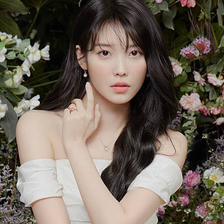

1/1 [==============================] - 1s 849ms/step
Mon Jun 19 09:34:50 2023


INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:34:50] "POST / HTTP/1.1" 200 -


{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"message","message":{"type":"text","id":"460259423211487331","text":"@線上客服"},"webhookEventId":"01H39G3V2ASZ3YXV4H7X6NBJ6J","deliveryContext":{"isRedelivery":false},"timestamp":1687167298278,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"replyToken":"f3e8cc4cdc494502964793bc6b8cbaee","mode":"active"}]}


INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:34:59] "POST / HTTP/1.1" 200 -


{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"message","message":{"type":"text","id":"460259430274695676","text":"@膚色調測驗"},"webhookEventId":"01H39G3Z61YHC6G6R09Y1CDP5A","deliveryContext":{"isRedelivery":false},"timestamp":1687167302592,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"replyToken":"348cebf97e974300b9829a0d3f879a60","mode":"active"}]}


INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:35:03] "POST / HTTP/1.1" 200 -


{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"postback","postback":{"data":"A"},"webhookEventId":"01H39G41KS6XKPA3ZV3KD5VEVS","deliveryContext":{"isRedelivery":false},"timestamp":1687167305019,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"replyToken":"99c976a7a1e1480289961c9edc1f8bae","mode":"active"}]}


INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:35:05] "POST / HTTP/1.1" 200 -


{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"postback","postback":{"data":"A"},"webhookEventId":"01H39G46NR7DMFT4YEGX03D7AW","deliveryContext":{"isRedelivery":false},"timestamp":1687167310105,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"replyToken":"27f8bab6195343f9a14764cb39f4986b","mode":"active"}]}


INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:35:11] "POST / HTTP/1.1" 200 -


{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"postback","postback":{"data":"A"},"webhookEventId":"01H39G4B1Z4QWGHVT2P0XERN1V","deliveryContext":{"isRedelivery":false},"timestamp":1687167314646,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"replyToken":"42870ca3a5d9490b8851df2e0f28c3d9","mode":"active"}]}


INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:35:15] "POST / HTTP/1.1" 200 -


{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"postback","postback":{"data":"A"},"webhookEventId":"01H39G4HN04QPREBX8KGDGM3ZZ","deliveryContext":{"isRedelivery":false},"timestamp":1687167321329,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"replyToken":"afc6d4f8e80a4acabc96699c133c5e0a","mode":"active"}]}


INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:35:22] "POST / HTTP/1.1" 200 -


{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"postback","postback":{"data":"A"},"webhookEventId":"01H39G4MKC9JCKB2ZNW0F3F9JZ","deliveryContext":{"isRedelivery":false},"timestamp":1687167324574,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"replyToken":"67aa600b3a3e4ca98222a119b799f87f","mode":"active"}]}


INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:35:25] "POST / HTTP/1.1" 200 -


{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"postback","postback":{"data":"B"},"webhookEventId":"01H39G4R07WF18DMCV7JRBX69X","deliveryContext":{"isRedelivery":false},"timestamp":1687167328168,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"replyToken":"57de2170669447ff9c4483bdfccf4a5a","mode":"active"}]}


INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:35:28] "POST / HTTP/1.1" 200 -


{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"postback","postback":{"data":"A"},"webhookEventId":"01H39G4TBHXM2FTKTVXAXT71P5","deliveryContext":{"isRedelivery":false},"timestamp":1687167330171,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"replyToken":"5c1da85343be4bb59ebe988d19b7b1cc","mode":"active"}]}


INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:35:31] "POST / HTTP/1.1" 200 -


{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"message","message":{"type":"text","id":"460259484901311019","text":"@虛擬化妝間"},"webhookEventId":"01H39G4Z51QKXF456W996VEYEP","deliveryContext":{"isRedelivery":false},"timestamp":1687167335171,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"replyToken":"ab1db6f6c8504b62a074fd4c6feb7c0d","mode":"active"}]}


INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:35:36] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:35:41] "POST / HTTP/1.1" 200 -


{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"postback","postback":{"data":"@Coral"},"webhookEventId":"01H39G549PTTQZMYVDNFK01534","deliveryContext":{"isRedelivery":false},"timestamp":1687167340792,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"replyToken":"92b7dcf59ada4a0c8ce80155f444d821","mode":"active"}]}
{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"message","message":{"type":"text","id":"460259494262997339","text":"Coral"},"webhookEventId":"01H39G549R72GC4YM36RECZTA9","deliveryContext":{"isRedelivery":false},"timestamp":1687167340792,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"replyToken":"af3d8653b4c14824a057c7427be1d5e5","mode":"active"}]}


INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:35:41] "POST / HTTP/1.1" 200 -


{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"message","message":{"type":"image","id":"460259507433112244","contentProvider":{"type":"line"}},"webhookEventId":"01H39G5CEQ5CE36TQJ621AMWZT","deliveryContext":{"isRedelivery":false},"timestamp":1687167348830,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"replyToken":"50c90d21137e40e3931835ad95ab2ccb","mode":"active"}]}
Mon Jun 19 09:35:49 2023
Mon Jun 19 09:35:51 2023


INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:35:51] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:35:52] "GET /content/drive/MyDrive/virtualmakeup/Coral460259507433112244.jpg HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:35:52] "GET /content/drive/MyDrive/virtualmakeup/Coral460259507433112244.jpg HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:35:52] "GET /content/drive/MyDrive/virtualmakeup/Coral460259507433112244.jpg HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [19/Jun/2023 09:36:04] "POST / HTTP/1.1" 200 -


{"destination":"U2ae5fb7567b93ff3a4b9104d6e868630","events":[{"type":"message","message":{"type":"text","id":"460259533773340804","text":"@限時優惠券"},"webhookEventId":"01H39G5V8J9ZNSAPGH2G06K9RQ","deliveryContext":{"isRedelivery":false},"timestamp":1687167364186,"source":{"type":"user","userId":"U978b21ba1799679c3e799e824c86c91d"},"replyToken":"31fa6012c08b4869a82e0e5d0205a469","mode":"active"}]}


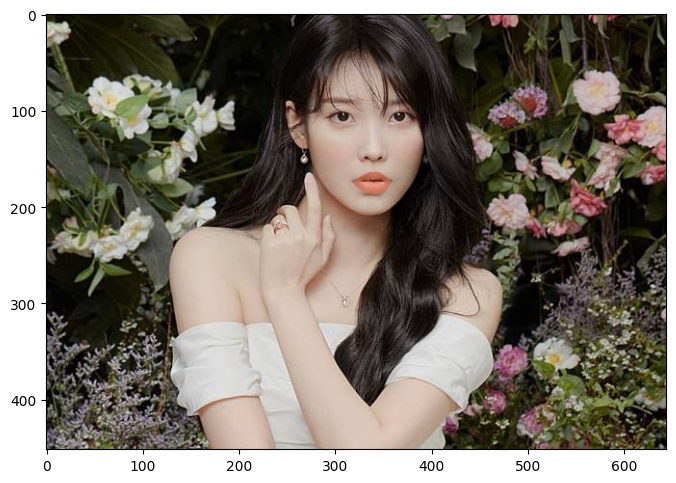

In [39]:
# 主程序運行
port = 5000
# Open a ngrok tunnel to the HTTP server
public_url = ngrok.connect(port).public_url
print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}\"".format(public_url, port))
app.run()